In [1]:
from comparison_utils import get_ride_data, analyze_and_plot_ride_data

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (5.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
SUMO_SIM_DATA_FOLDER = "./sim_data"

In [3]:
comparison_data = [
    {
        "scenario_name": "Frankfurter Allee (Alfredstr. to Ruschestr.)",
        "sumo_sim_files": ["B1_new_params.csv", "B1_default.csv"],
        "start_rect_coords": (13.489109,52.512004,13.48953,52.512492),
        "end_rect_coords": (13.484732,52.512494,13.485153,52.512982)
    },
    {
        "scenario_name": "Frankfurter Allee (Rathausstr. to Möllendorfstr.)",
        "sumo_sim_files": ["B1_new_params.csv", "B1_default.csv"],
        "start_rect_coords": (13.481105,52.513004,13.481526,52.513374),
        "end_rect_coords": (13.477682,52.513305,13.478103,52.513675)
    },
    {
        "scenario_name": "Einsteinufer (Marchbrücke to Charlotenburger Brücke)",
        "sumo_sim_files": ["CHB_new_params.csv", "CHB_default.csv"],
        "start_rect_coords": (13.324764,52.516524,13.32511,52.517017),
        "end_rect_coords": (13.329785,52.513501,13.330475,52.513615)
    },
    {
        "scenario_name": "Einsteinufer (Charlotenburger Brücke to Hardenbergstr.)",
        "sumo_sim_files": ["CHB_new_params.csv", "CHB_default.csv"],
        "start_rect_coords": (13.330096,52.51275,13.330786,52.512864),
        "end_rect_coords": (13.328176,52.508454,13.328866,52.508568)
    },
    {
        "scenario_name": "Prinzenstr (Annenstr. to Moritzplatz)",
        "sumo_sim_files": ["prinzenstr_new_params.csv", "prinzenstr_default.csv"],
        "start_rect_coords": (13.413598,52.507573,13.414164,52.507822),
        "end_rect_coords": (13.410895,52.504089,13.411461,52.504338)
    },
    {
        "scenario_name": "Prinzenstr (Dresdener Str. to Sebastianstr.)",
        "sumo_sim_files": ["prinzenstr_new_params.csv", "prinzenstr_default.csv"],
        "start_rect_coords": (13.412877,52.506571,13.413298,52.506765),
        "end_rect_coords": (13.411595,52.504951,13.412016,52.505145)
    },
    {
        "scenario_name": "Oranienstr (Mariannenstr. to Adalbertstr.)",
        "sumo_sim_files": ["oranienstr_new_params.csv", "oranienstr_default.csv"],
        "start_rect_coords": (13.422222,52.500212,13.422505,52.500645),
        "end_rect_coords": (13.419491,52.500976,13.419774,52.501409)
    },
    {
        "scenario_name": "Oranienstr (Adalbertstr. to Oranienplatz)",
        "sumo_sim_files": ["oranienstr_new_params.csv", "oranienstr_default.csv"],
        "start_rect_coords": (13.418756,52.501182,13.419039,52.501615),
        "end_rect_coords": (13.416766,52.501724,13.417049,52.502157)
    },
    {
        "scenario_name": "Waldstr. (Turmstr. to Siemensstr.)",
        "sumo_sim_files": ["moabit_new_params.csv", "moabit_default.csv"],
        "start_rect_coords": (13.329907,52.527466,13.331534,52.527762),
        "end_rect_coords": (13.331344,52.532257,13.332392,52.532553)
    }
]

----- Frankfurter Allee (Alfredstr. to Ruschestr.) -----
SimRa
---
Color: blue
Number of rows: 3424
Number of rides: 197
-----
SUMO [B1_new_params.csv]
---
color: orange
Number of rides: 150
-----
SUMO [B1_default.csv]
---
color: green
Number of rides: 150
-----
-----
Ride paths:


/home/alex/.local/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


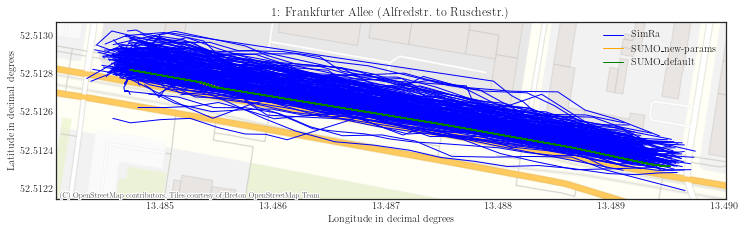

Velocity histograms (normalized):


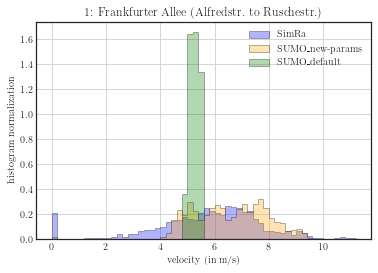

Ride duration histograms (normalized):


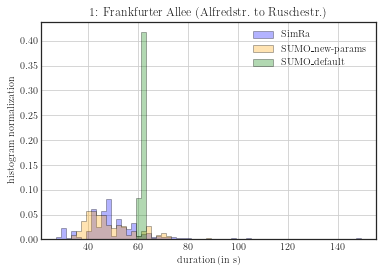

----- Frankfurter Allee (Rathausstr. to Möllendorfstr.) -----
SimRa
---
Color: blue
Number of rows: 3799
Number of rides: 222
-----
SUMO [B1_new_params.csv]
---
color: orange
Number of rides: 150
-----
SUMO [B1_default.csv]
---
color: green
Number of rides: 150
-----
-----
Ride paths:


/home/alex/.local/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


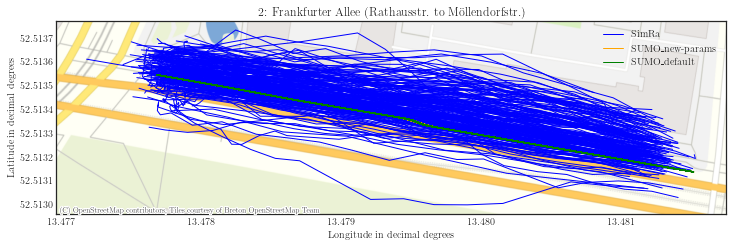

Velocity histograms (normalized):


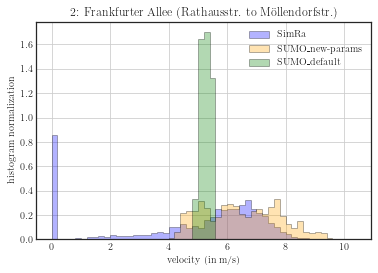

Ride duration histograms (normalized):


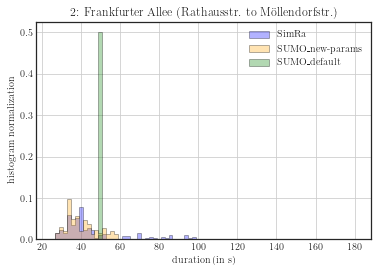

In [4]:
duration_divergences = {}
scenario_data = {}

for comp_idx, comp_data in enumerate(comparison_data[0:2]):
    scenario_name = comp_data['scenario_name']
    ride_data = get_ride_data(SUMO_SIM_DATA_FOLDER, **comp_data)
    
    parent_scenario_name = comp_data['sumo_sim_files'][0].split('_')[0]
    n_rides_simra = len(ride_data['SimRa'].groupby('ride_id').groups)
    avg_duration_simra = ride_data['SimRa'].duration.mean().total_seconds()
    scenario_data[comp_idx] = {
        'Scenario Name': scenario_name,
        # 'Parent Scenario': parent_scenario_name, 
        'Number of SimRa Rides': n_rides_simra, 
        # 'Avg. SimRa Ride Duration (in s)': round(avg_duration_simra, 2)
    }

    duration_divergences[comp_idx] = analyze_and_plot_ride_data(ride_data, str(comp_idx + 1) + ": " + scenario_name)

In [5]:
duration_divergences

{0: {'SUMO_new-params': 0.1764127460492494,
  'SUMO_default': 0.6945862648696634},
 1: {'SUMO_new-params': 0.2814427718472883,
  'SUMO_default': 0.7175511774600676}}

In [ ]:
divergences_default = []
divergences_new_params = []

for scenario_name, scenario_divergences in duration_divergences.items():
    for data_name, divergence in scenario_divergences.items():
        if data_name.endswith('_default'):
            divergences_default.append(divergence)
        elif data_name.endswith('_new-params'):
            divergences_new_params.append(divergence)

print(divergences_default)
print(divergences_new_params)


In [ ]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

x_values = [idx + 1 for idx in duration_divergences.keys()]

fig = plt.figure(figsize=(14, 6))
bax = brokenaxes(ylims=((0, .1), (.4, .9)), hspace=.2)
bax.scatter(x_values, divergences_default, label="SUMO default parameters", color='green', s=80)
bax.scatter(x_values, divergences_new_params, label="SimRa-based re-parameterization", color='orange', s=80)

bax.legend(loc=3, frameon=True)
bax.set_xlabel('Scenario number')
bax.set_ylabel('JS divergence from SimRa data')
bax.set_title("Jensen–Shannon divergence beteween empirical distributions of ride durations for selected scenarios")

# plt.savefig("duration_js_divergence.png", bbox_inches="tight")
plt.show()

In [ ]:
fig = plt.figure(figsize=(14, 6))

plt.bar(x_values, divergences_default, label="SUMO default parameters", color='green', align='edge', width=0.2)
plt.bar(x_values, divergences_new_params, label="SUMO re-parameterization", color='orange', align='edge', width=-0.2)

plt.xticks(x_values)
plt.legend(loc=3, frameon=True)
plt.xlabel('Scenario number')
plt.ylabel('JS divergence')
plt.title("Jensen–Shannon (JS) divergence\n of simulated ride durations from SimRa data")
# fig.suptitle("Jensen–Shannon (JS) divergence")

plt.savefig("./images/duration_js_divergence.png", bbox_inches="tight")
plt.show()

In [ ]:
import pandas as pd

df_scenario_data = pd.DataFrame.from_dict(scenario_data).transpose()
# df_scenario_data.drop('Parent Scenario', axis='columns', inplace=True)
# df_scenario_data.drop('Avg. SimRa Ride Duration (in s)', axis='columns', inplace=True)
# df_scenario_data['Scenario Name'] = df_scenario_data['Scenario Name'].apply(lambda s: '\n('.join(s.split(' (')),)


display(df_scenario_data)
print(df_scenario_data.to_latex(escape=False))